<a href="https://colab.research.google.com/github/tomdaler/Machine-Learning/blob/main/Wine%20Quality/1_Explore_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [5]:
df['quality']= df['quality']-3

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaled_features = df.copy()

col_names = ['fixed acidity','free sulfur dioxide','total sulfur dioxide','alcohol','pH','residual sugar']
features = scaled_features[col_names]
df_new = scale.fit_transform(features)

scaled_features[col_names] = df_new

In [7]:
scaled_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.700,0.00,-0.453218,0.076,-0.466193,-0.379133,0.99780,1.288643,0.56,-0.960246,2
1,-0.298547,0.880,0.00,0.043416,0.098,0.872638,0.624363,0.99680,-0.719933,0.68,-0.584777,2
2,-0.298547,0.760,0.04,-0.169427,0.092,-0.083669,0.229047,0.99700,-0.331177,0.65,-0.584777,2
3,1.654856,0.280,0.56,-0.453218,0.075,0.107592,0.411500,0.99800,-0.979104,0.58,-0.584777,3
4,-0.528360,0.700,0.00,-0.453218,0.076,-0.466193,-0.379133,0.99780,1.288643,0.56,-0.960246,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.600,0.08,-0.382271,0.090,1.542054,-0.075043,0.99490,0.899886,0.58,0.072294,2
1595,-1.390155,0.550,0.10,-0.240375,0.062,2.211469,0.137820,0.99512,1.353436,0.76,0.729364,3
1596,-1.160343,0.510,0.13,-0.169427,0.076,1.255161,-0.196679,0.99574,0.705508,0.75,0.541630,3
1597,-1.390155,0.645,0.12,-0.382271,0.075,1.542054,-0.075043,0.99547,1.677400,0.71,-0.209308,2


In [14]:
X = scaled_features.drop(['quality'],axis=1)
y = scaled_features['quality']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

Visualize correlations

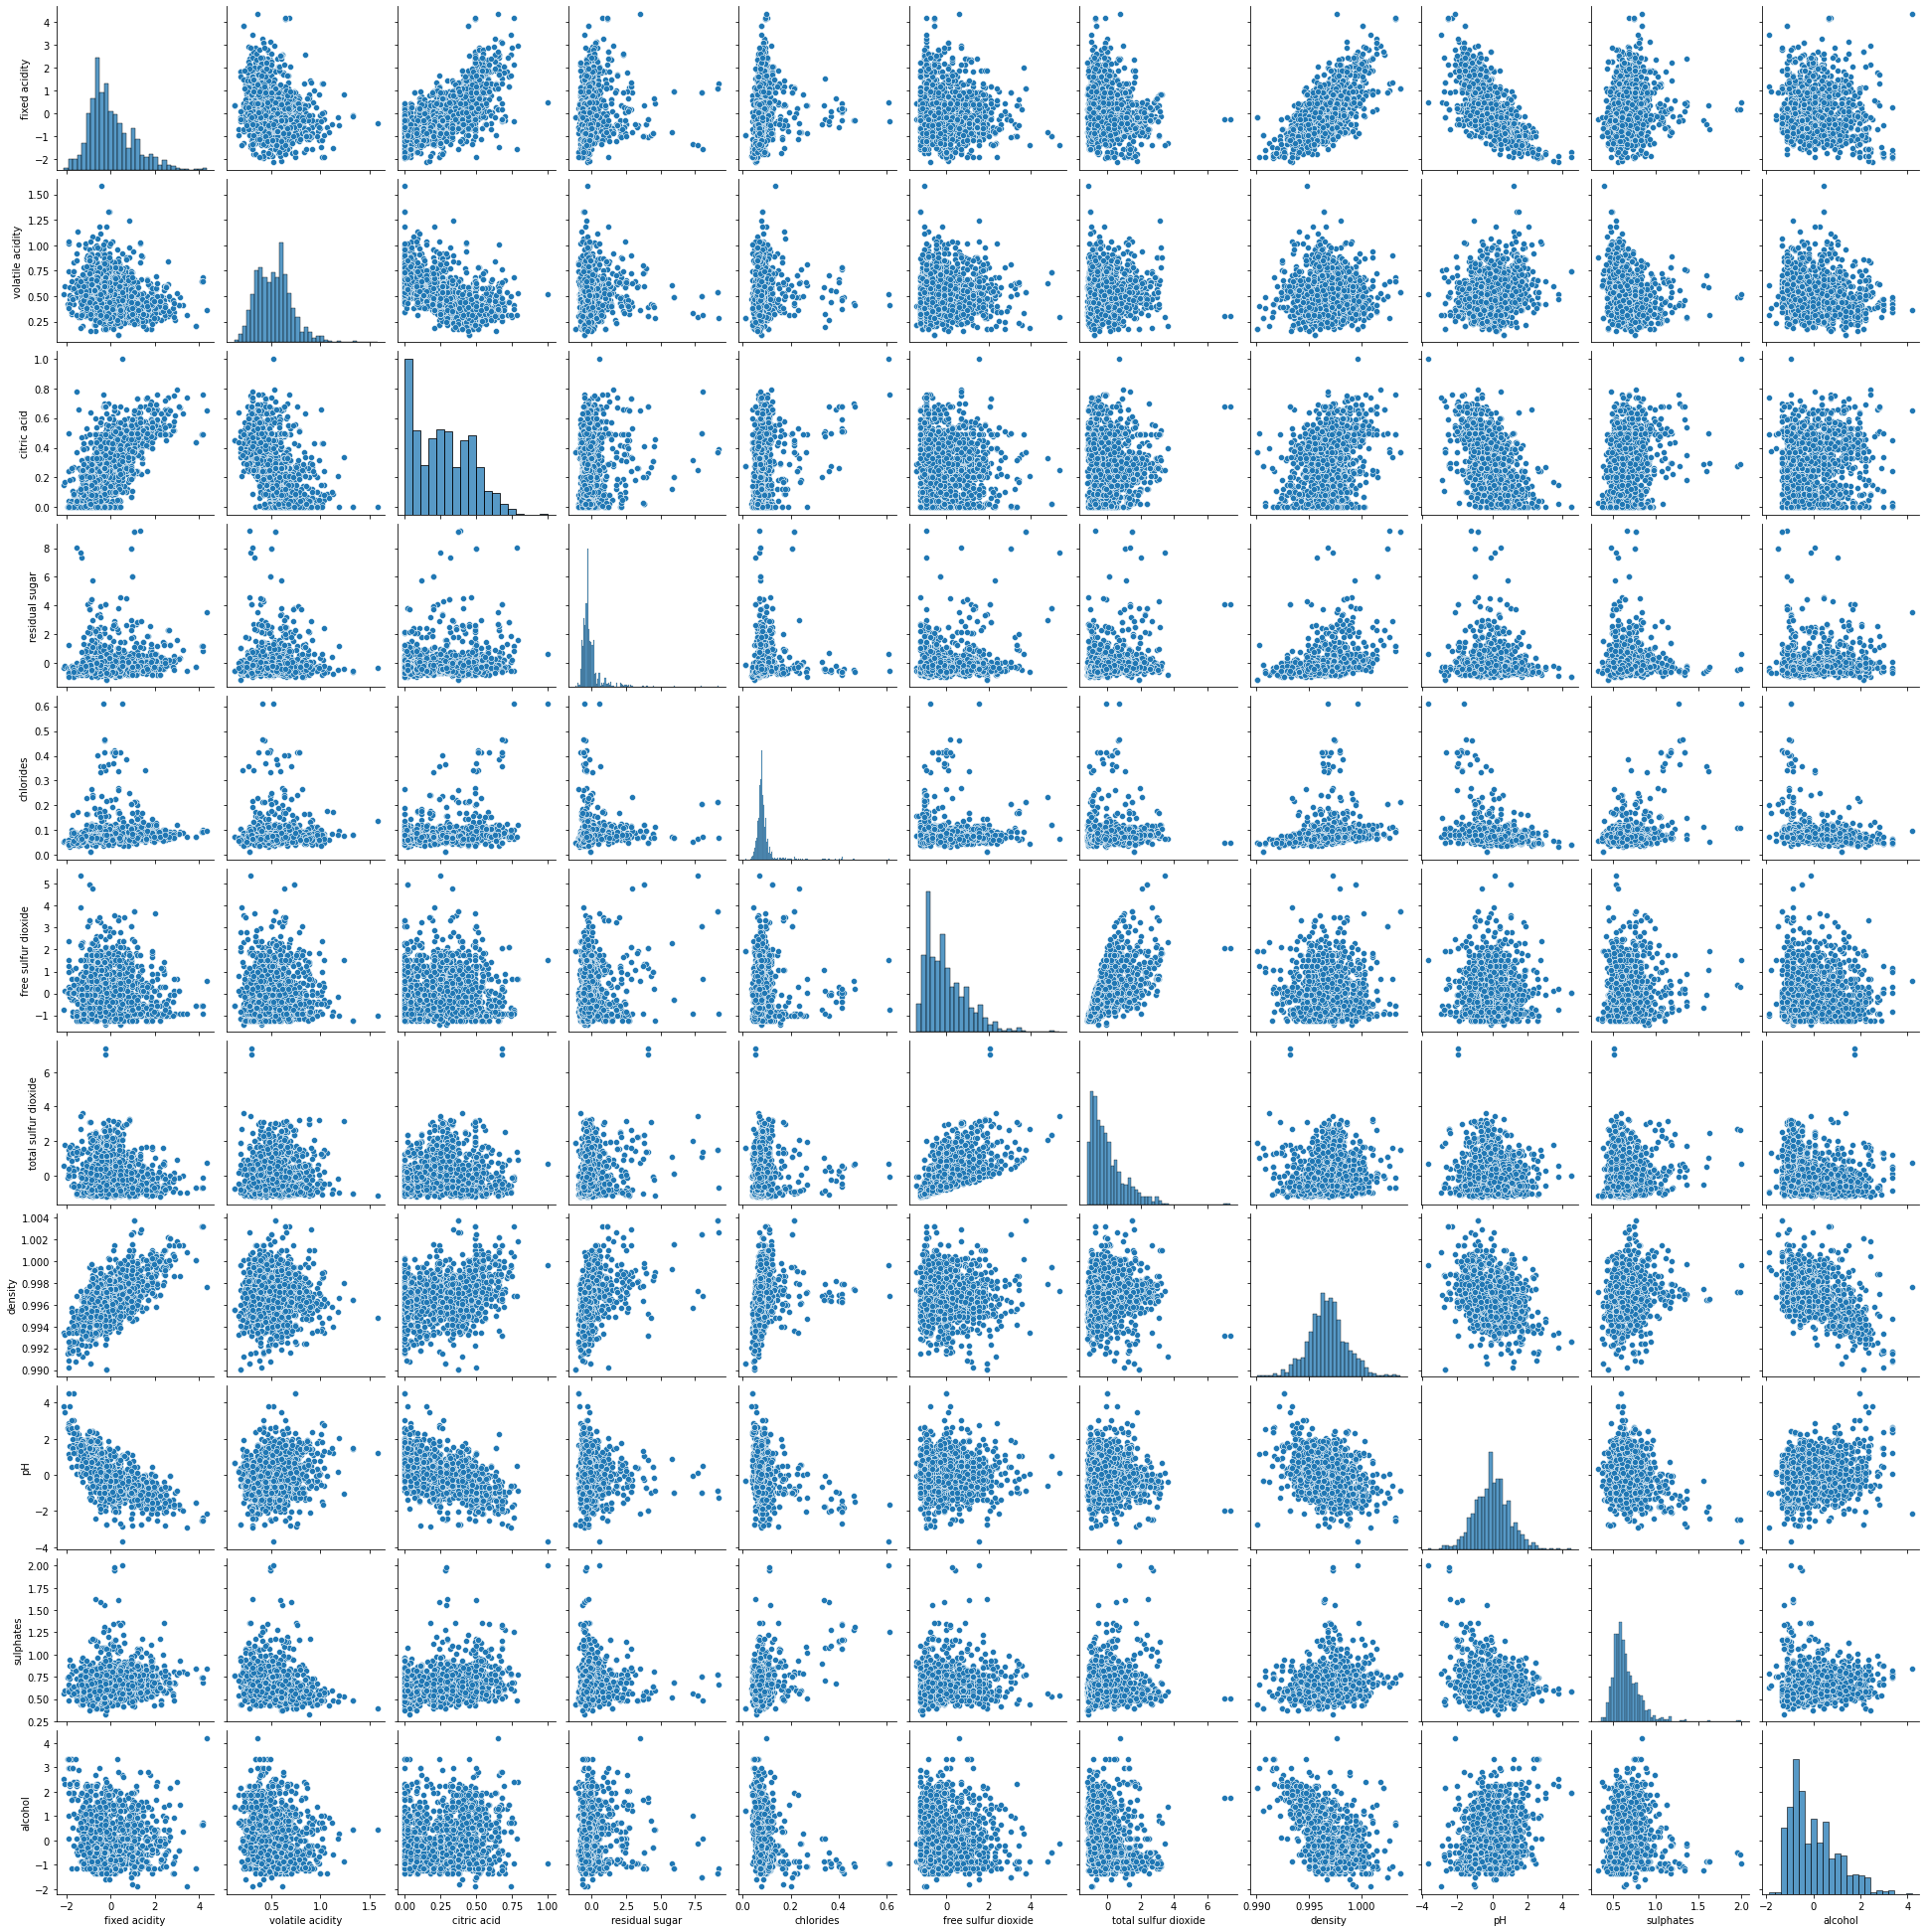

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.pairplot(X)

PRINCIPAL COMPONENTS

In [15]:
from sklearn.decomposition import PCA
pca =PCA(n_components=11)
pca.fit(X)
pca.explained_variance_ratio_

array([3.02032018e-01, 2.88610783e-01, 1.73447282e-01, 1.24215521e-01,
       5.60203250e-02, 4.35915954e-02, 6.35988925e-03, 3.79721382e-03,
       1.68533816e-03, 2.39941742e-04, 9.19773465e-08])

In [16]:
X=X.drop(['alcohol', 'sulphates','pH','density'], axis=1)

In [17]:
from sklearn.decomposition import PCA
pca =PCA(n_components=7)
pca.fit(X)
pca.explained_variance_ratio_

array([0.44020762, 0.27664489, 0.18911662, 0.08146158, 0.00950371,
       0.00258419, 0.00048139])

In [18]:
X=X.drop(['total sulfur dioxide'], axis=1)
from sklearn.decomposition import PCA
pca =PCA(n_components=6)
pca.fit(X)
pca.explained_variance_ratio_

array([0.3891562 , 0.36660101, 0.22731986, 0.01260243, 0.00368141,
       0.00063909])

These fields are not important

alcohol
solphates
pH
density
total sulfur dioxide


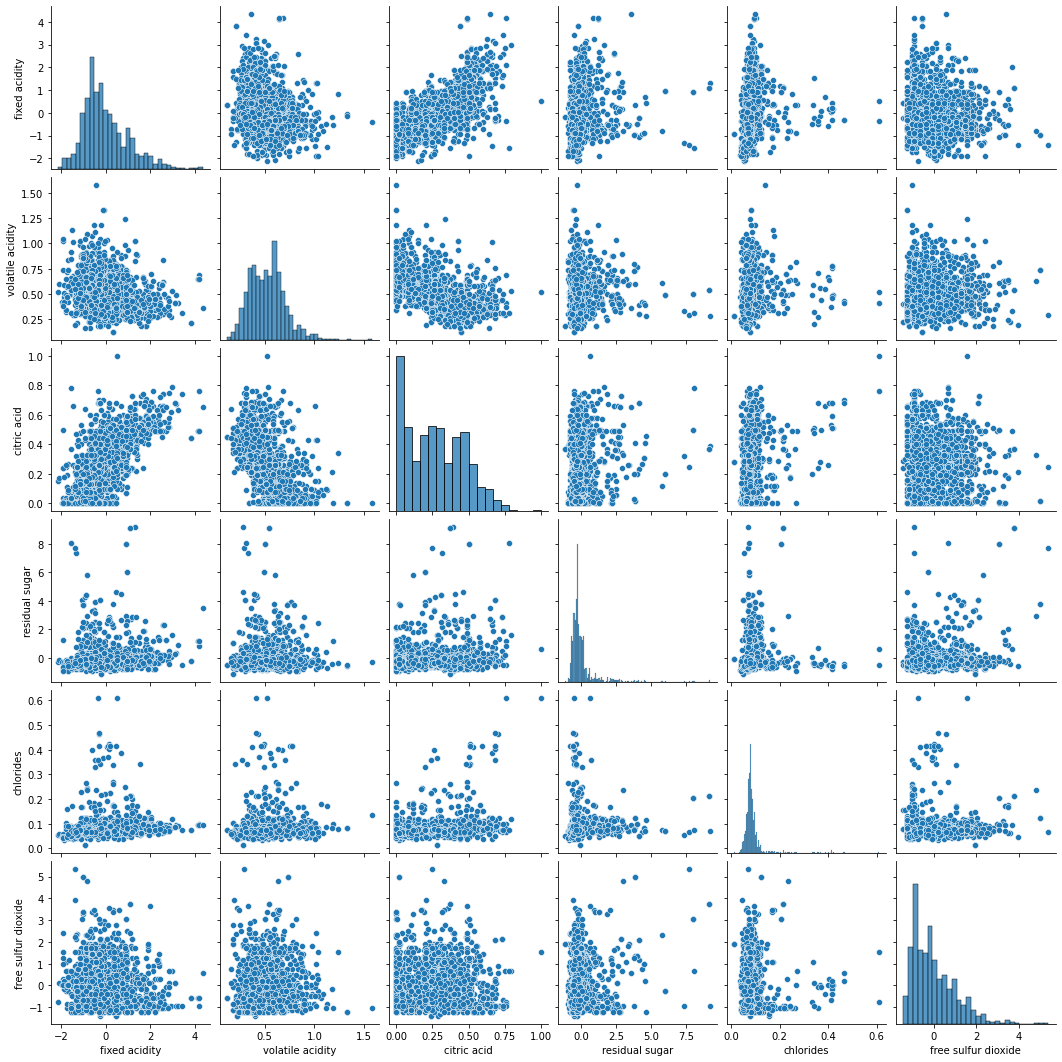

In [19]:
sns.pairplot(X)